In [1]:
import classes
import show_game
import show_classes
import functions as f
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import Encoder_Decoder as ed
from torch.autograd import Variable
from torchvision.utils import save_image
import torch

# Generate Training Images for the VAE

In [3]:
#initialize GA
N_generations = 3
N_population = 100
var_of_mutation = 1
max_net_width = 4
max_net_lenght = 4
binomial = 0.4
balls_to_duplicate = 45
training = True
dec_input = False
fix_shape = False
Net_type = classes.ReLU_Net

#populate __init__ method with starting parameters
new = classes.GA(N_generations, N_population, var_of_mutation, binomial, max_net_width, max_net_lenght, balls_to_duplicate,
                 Net_type, training, dec_input, fix_shape)

#start GA
new.main()

print(len(new.xArray))
#f.show_image(new.xArray[5])
print(new.best_scores_generations)

Generation=0
train


RuntimeError: shape '[1, 10]' is invalid for input of size 5084

# Show Training Images

torch.Size([5883, 62, 82])


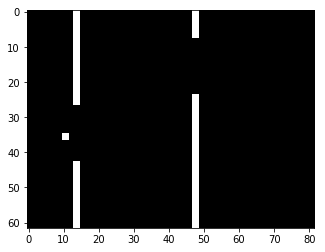

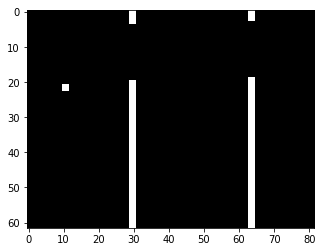

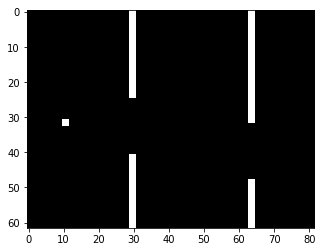

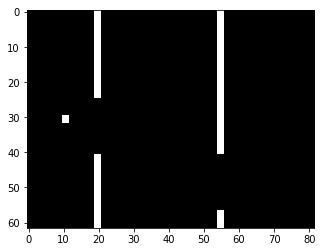

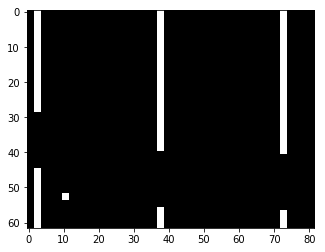

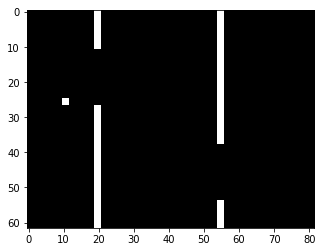

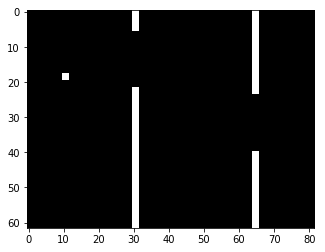

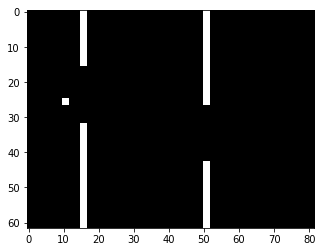

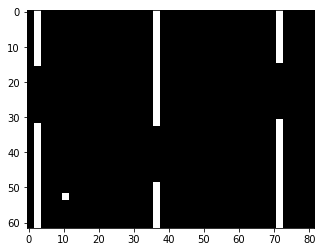

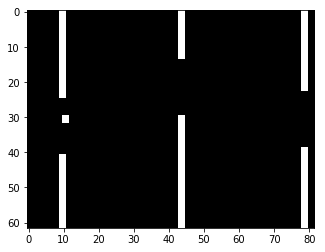

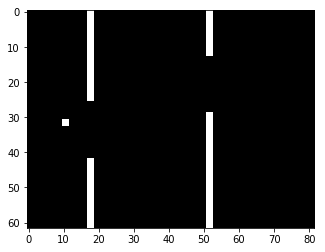

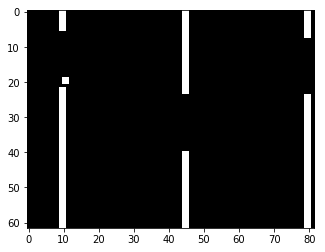

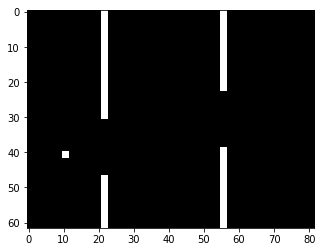

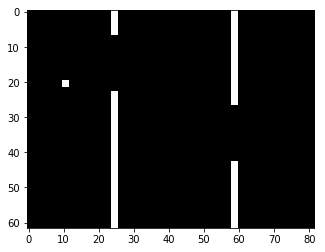

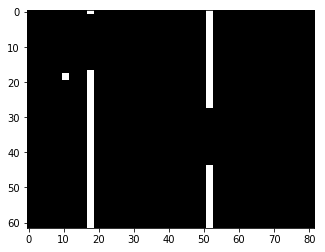

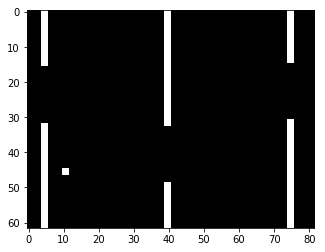

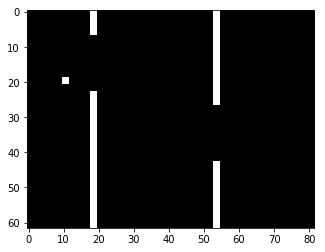

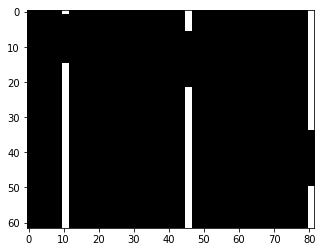

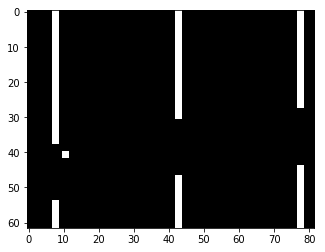

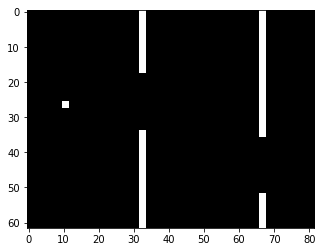

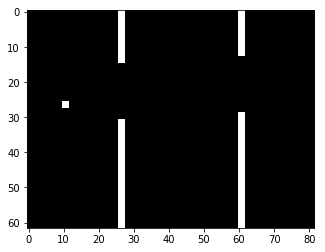

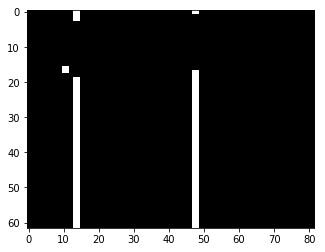

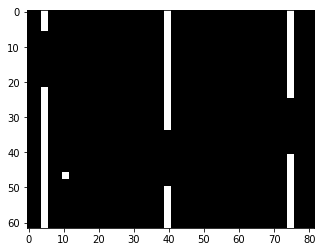

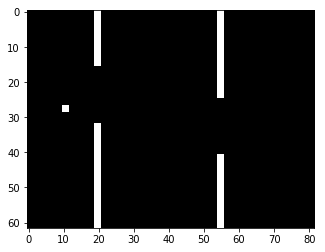

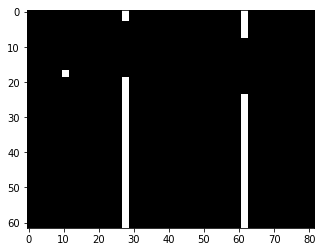

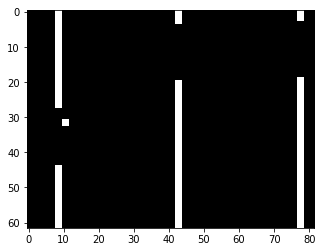

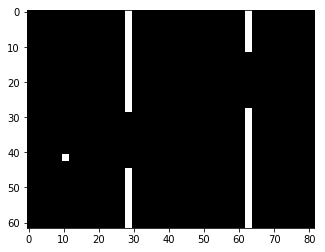

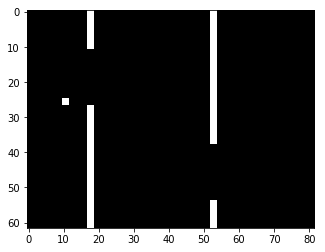

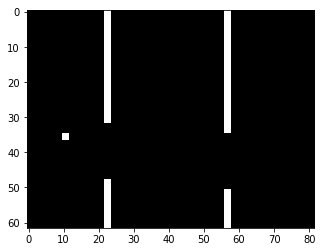

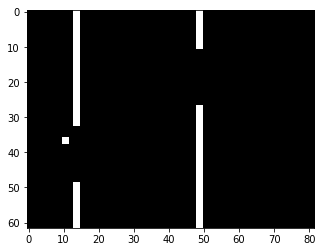

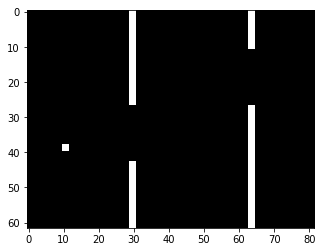

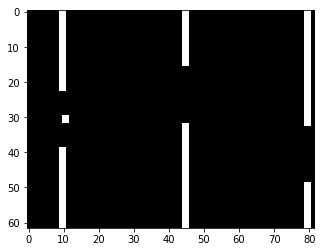

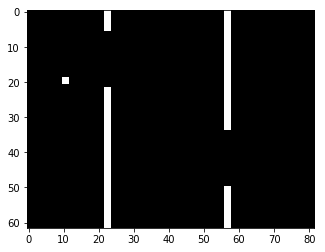

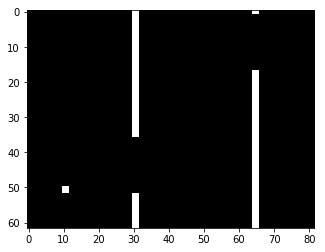

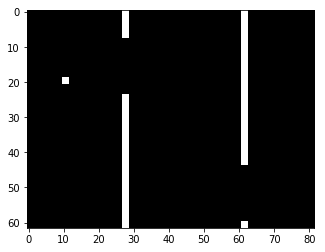

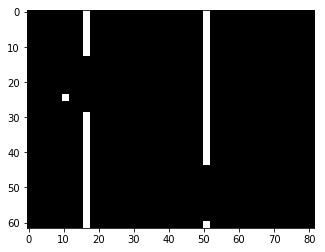

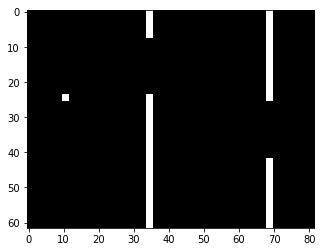

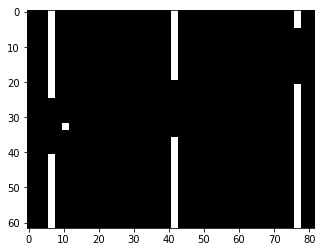

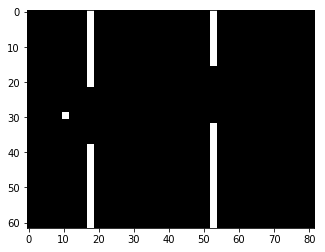

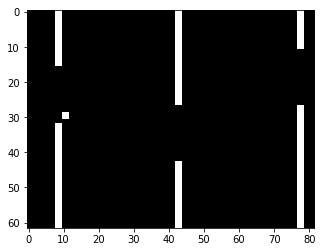

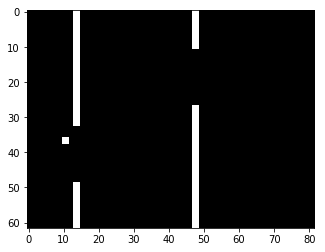

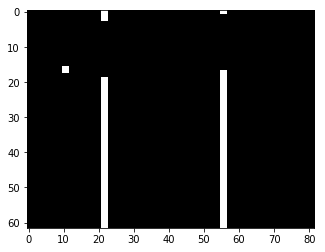

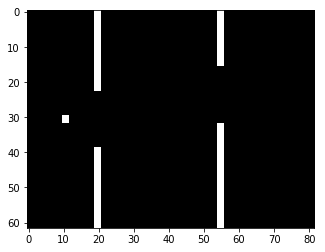

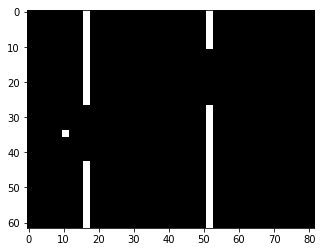

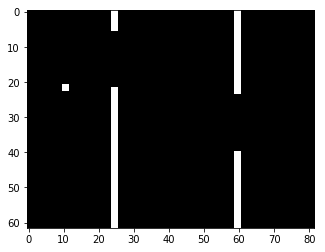

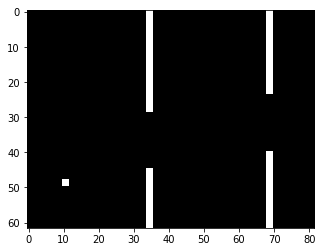

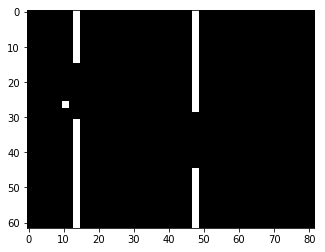

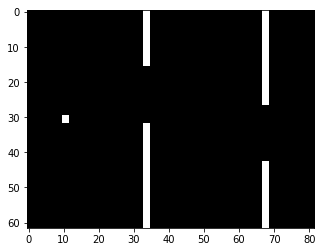

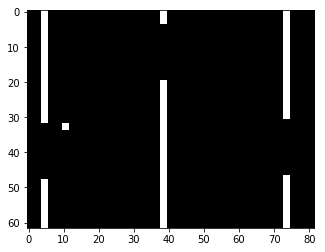

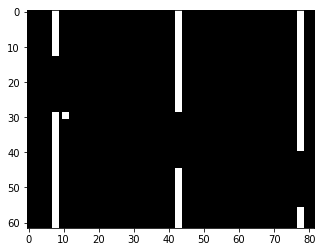

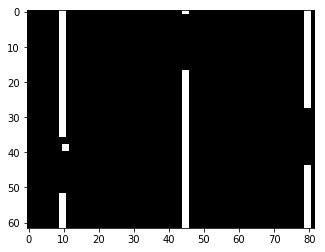

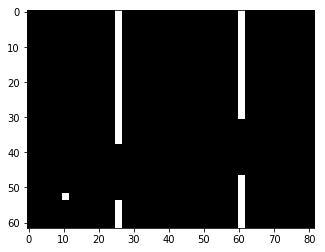

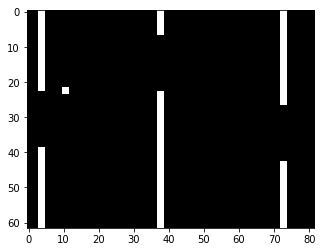

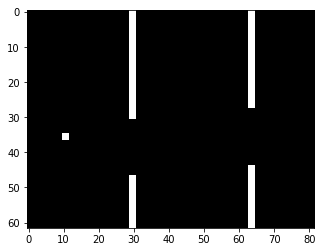

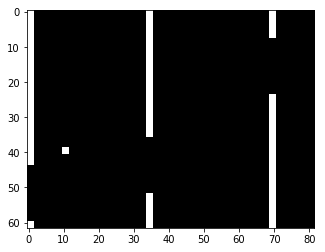

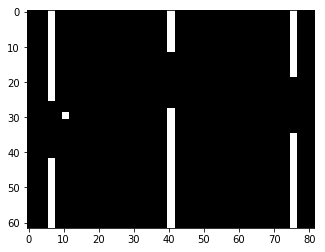

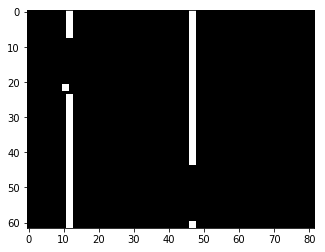

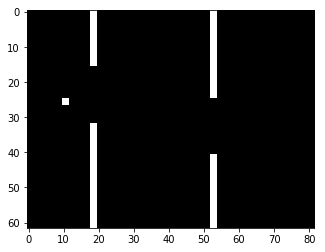

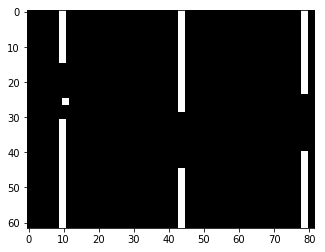

In [14]:
print(new.xArray.size())
a = new.xArray[1:]
a = a[torch.randperm(len(new.xArray[1:]))]

for j,i in enumerate(a):
    if j%100==0:
        f.show_image(i)

# Initialize Data-Loader and neuronal Net

In [15]:
#create data-loader class for training:
dataset = classes.Data(a[:(len(a)-500)],a[:(len(a)-500)])

batch_size = 128
dataloader = DataLoader(dataset, batch_size,shuffle=True) 

#create data-loader class for validation:
datasetv = classes.Data(a[(len(a)-500):],a[(len(a)-500):])

batch_size = 128
dataloaderv = DataLoader(datasetv, batch_size,shuffle=False) 

In [16]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'

encoder_layer_sizes = [5084,2000,1000,500]
decoder_layer_sizes = [500,1000,2000,5084]

latent_dim = 5
vae = ed.CVAE(inp_dim=62*82, encoder_layer_sizes=encoder_layer_sizes, 
           decoder_layer_sizes=decoder_layer_sizes, latent_dim=latent_dim)
vae = vae.to(device)


# Train neuronal Net

In [17]:
optimizer = optim.Adam(vae.parameters(), lr=1e-3)#, eps=1e-4) #Adam
# Training of the VAE
"""Training"""
def train(epoch):   
    vae.train()
    train_loss = 0    
    #i =1
    for data, batch_idx in (dataloader):
        x, y = data
          
        x = x.to(device)
        optimizer.zero_grad()
        recon_batch, mu, log_var = vae(x)
        
        recon_batch = recon_batch.to(device)
        mu = mu.to(device)
        log_var = log_var.to(device)
        
        loss = ed.loss_function(recon_batch,  x, mu, log_var)
        
        loss.backward()
        
        train_loss += loss.item()
        
        optimizer.step()
    return train_loss
        
"""Validation"""
def val(epoch):
    train_lossv = 0
    vae.train()
    for datav, batch_idxv in dataloaderv:
        xv,yv = datav
            
        xv = xv.to(device)
        recon_batchv, muv, log_varv = vae(xv)

        recon_batchv = recon_batchv.to(device)
        muv = muv.to(device)
        log_varv = log_varv.to(device)

        lossv = ed.loss_function(recon_batchv,  xv, muv, log_varv)

        train_lossv += lossv.item()
            
    return train_lossv


epochs = 1000

trainingLoss = torch.zeros(epochs)
trainingLossv = torch.zeros(epochs)


for epoch in range(epochs):
    if epoch % 100 ==0:
        print("Epoche={}".format(epoch))
    v = val(epoch)
    t = train(epoch)
    trainingLoss[epoch] = t
    trainingLossv[epoch] = v

torch.save(vae,'./vae.pt')

Epoche=0
Epoche=100
Epoche=200
Epoche=300
Epoche=400
Epoche=500
Epoche=600
Epoche=700
Epoche=800
Epoche=900


# Plot Validation and Training Loss

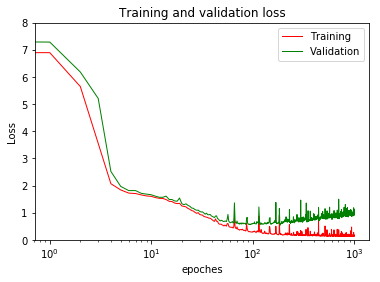

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(epochs)
plt.plot(x,trainingLoss.numpy()/(len(a)-500),color="red",label="Training",linewidth=1)
plt.plot(x,trainingLossv.numpy()/500,color="green",label="Validation",linewidth=1)
plt.ylabel("Loss")
plt.xlabel("epoches")
plt.title("Training and validation loss")
plt.legend()
plt.xscale('log')
plt.ylim(0,8)
plt.savefig("Loss.png",dpi=300)

## Plot Reconstructed Images

0
tensor([[-0.9251,  1.0615, -2.7918, -0.7910, -1.0799]], device='cuda:0',
       grad_fn=<AddBackward0>)


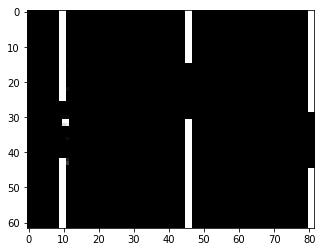

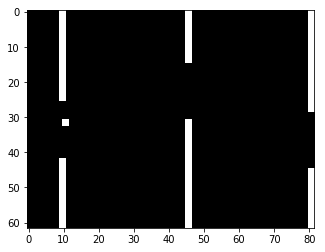

100
tensor([[-0.6261,  0.6800,  1.2617, -1.7080,  0.5784]], device='cuda:0',
       grad_fn=<AddBackward0>)


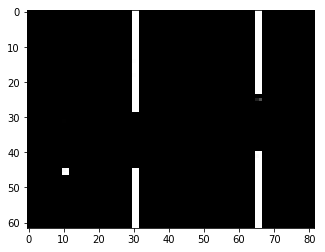

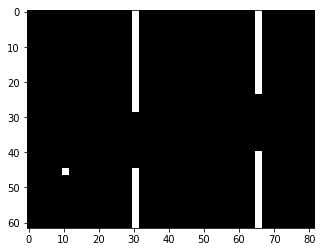

200
tensor([[ 1.7548, -0.0621,  2.5727, -0.6840, -0.4167]], device='cuda:0',
       grad_fn=<AddBackward0>)


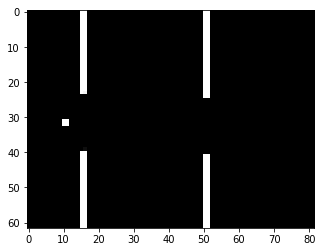

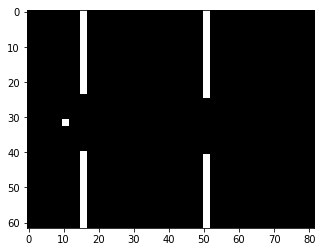

300
tensor([[-0.7404, -0.6767,  1.4540,  1.0251, -2.7635]], device='cuda:0',
       grad_fn=<AddBackward0>)


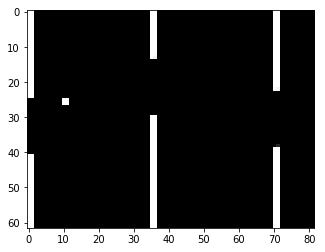

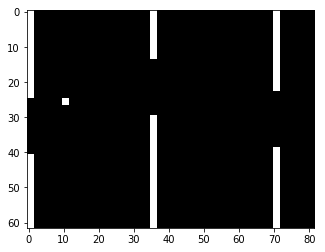

400
tensor([[-2.1922, -2.1483, -0.0447, -1.5658,  0.8429]], device='cuda:0',
       grad_fn=<AddBackward0>)


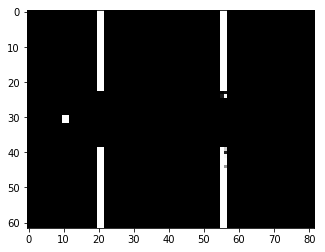

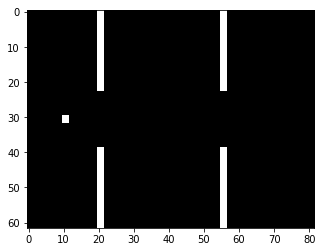

500
tensor([[-0.6024,  1.5202, -0.4374,  2.3623,  1.5448]], device='cuda:0',
       grad_fn=<AddBackward0>)


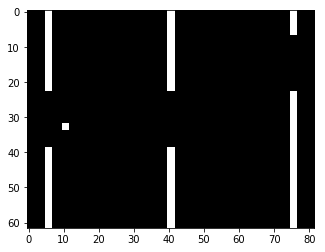

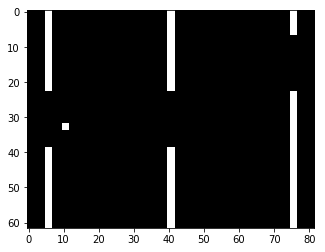

600
tensor([[ 1.6525,  0.7855, -1.4873,  0.8012, -0.0572]], device='cuda:0',
       grad_fn=<AddBackward0>)


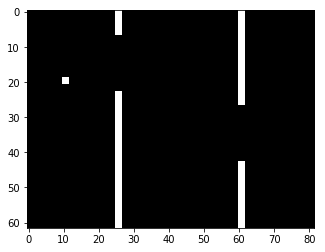

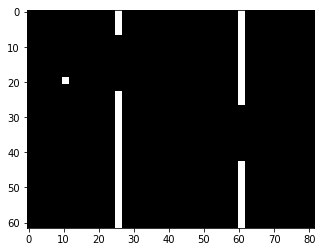

700
tensor([[ 0.1098,  0.6568, -1.6576, -0.6921, -0.5630]], device='cuda:0',
       grad_fn=<AddBackward0>)


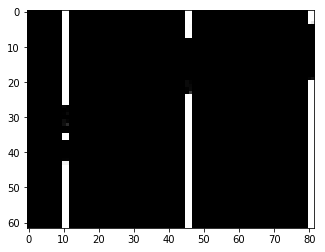

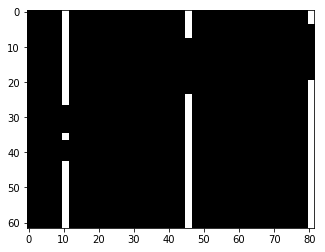

800
tensor([[ 0.5307, -0.4296, -0.3750, -1.6607,  1.2116]], device='cuda:0',
       grad_fn=<AddBackward0>)


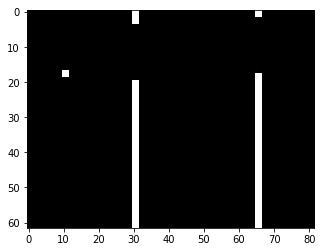

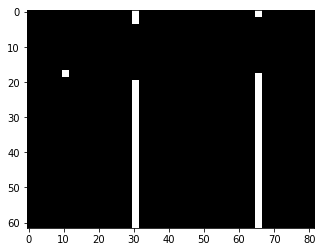

900
tensor([[ 1.0223,  0.1117,  0.8751,  0.1299, -0.0785]], device='cuda:0',
       grad_fn=<AddBackward0>)


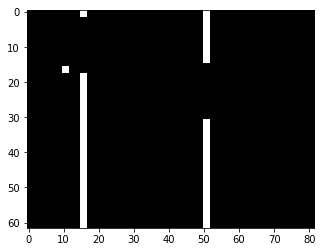

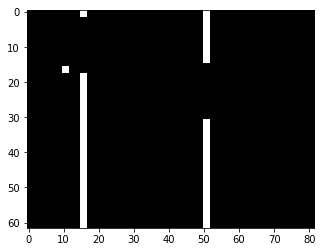

1000
tensor([[ 0.2982, -0.6992,  1.1079,  1.2654, -2.3411]], device='cuda:0',
       grad_fn=<AddBackward0>)


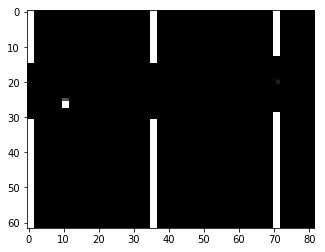

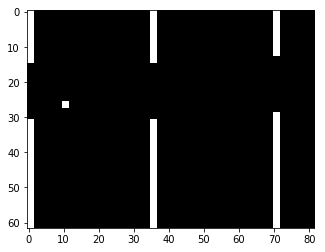

1100
tensor([[ 0.0057, -1.4510,  2.5558, -0.3302,  0.7524]], device='cuda:0',
       grad_fn=<AddBackward0>)


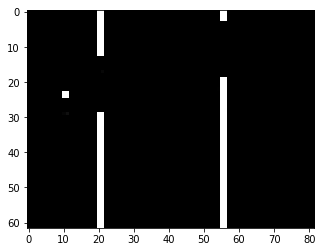

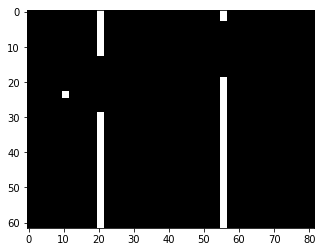

1200
tensor([[-0.8518,  1.1260, -0.4422,  0.2322,  0.8067]], device='cuda:0',
       grad_fn=<AddBackward0>)


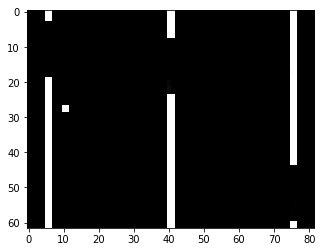

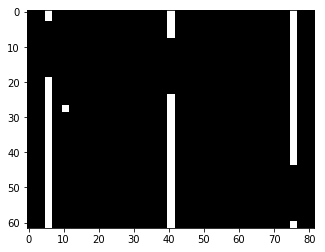

1300
tensor([[ 0.4997,  0.7924, -0.8409,  0.6507, -0.5729]], device='cuda:0',
       grad_fn=<AddBackward0>)


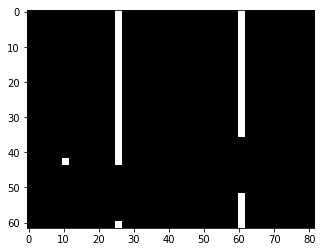

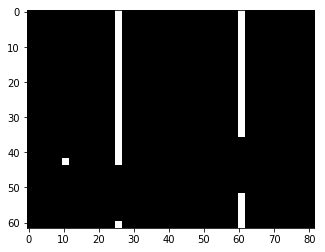

1400
tensor([[ 0.0163,  1.1541, -1.8316, -1.6951,  0.1538]], device='cuda:0',
       grad_fn=<AddBackward0>)


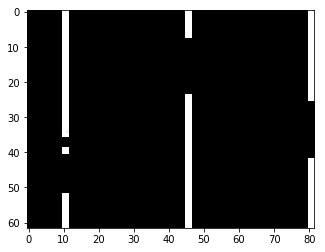

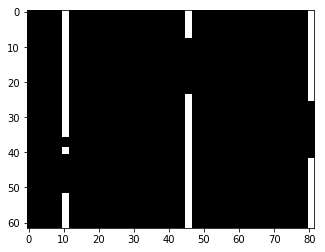

1500
tensor([[ 0.1107,  0.6117,  0.8984, -2.0867,  0.9398]], device='cuda:0',
       grad_fn=<AddBackward0>)


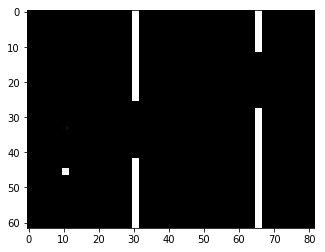

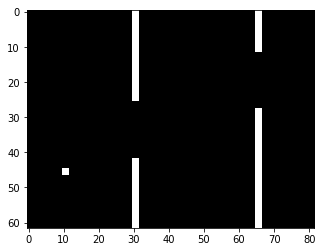

1600
tensor([[ 1.7004, -0.3819,  1.2649, -0.0308,  0.0676]], device='cuda:0',
       grad_fn=<AddBackward0>)


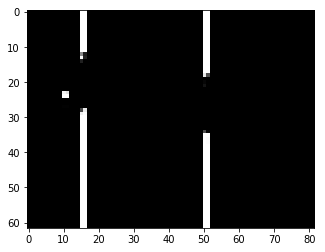

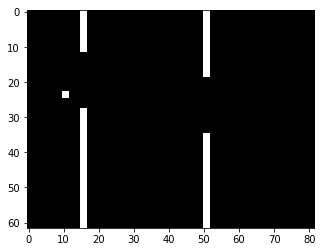

1700
tensor([[ 0.8098,  0.5091,  1.7355, -0.4314, -2.5091]], device='cuda:0',
       grad_fn=<AddBackward0>)


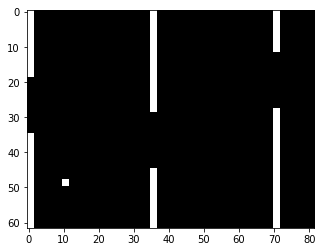

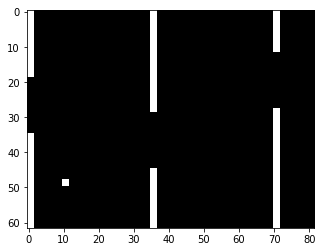

1800
tensor([[-1.6094, -0.9319,  1.2264, -1.0524, -0.0643]], device='cuda:0',
       grad_fn=<AddBackward0>)


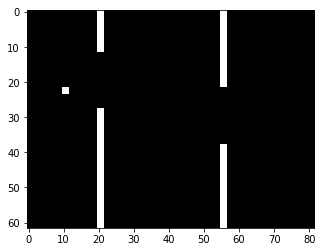

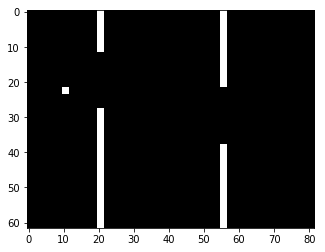

1900
tensor([[-2.1920,  0.4969,  0.6319,  1.8037,  1.3411]], device='cuda:0',
       grad_fn=<AddBackward0>)


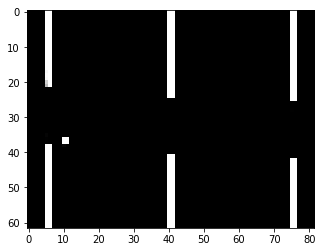

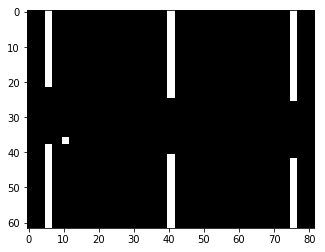

2000
tensor([[ 0.5782,  1.6226, -0.4411,  1.3637,  0.1047]], device='cuda:0',
       grad_fn=<AddBackward0>)


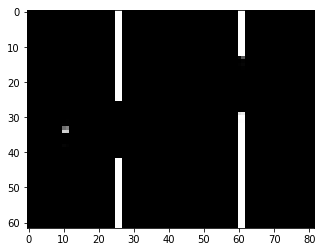

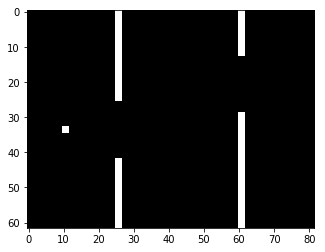

2100
tensor([[-0.4949,  0.7928, -1.5420, -2.1235,  0.6072]], device='cuda:0',
       grad_fn=<AddBackward0>)


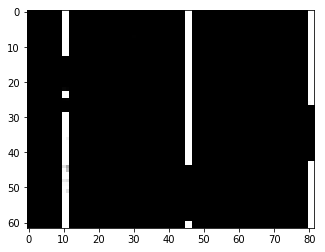

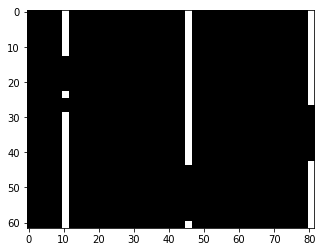

2200
tensor([[ 0.3404,  0.5010, -0.2458, -2.1512,  1.2949]], device='cuda:0',
       grad_fn=<AddBackward0>)


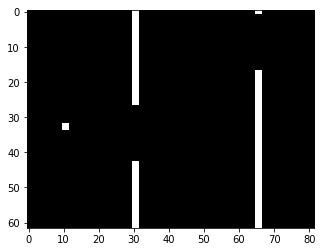

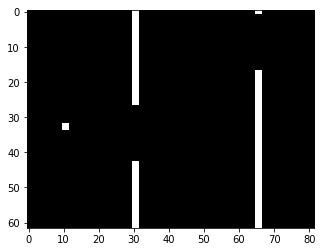

2300
tensor([[ 0.8860,  0.5534,  0.4216, -0.2304, -0.2239]], device='cuda:0',
       grad_fn=<AddBackward0>)


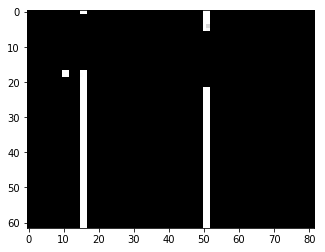

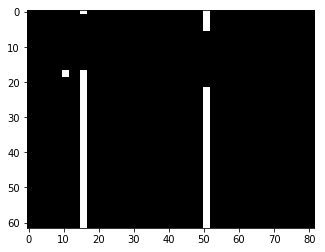

2400
tensor([[ 0.3641,  0.3469,  0.4068, -0.3203, -1.9808]], device='cuda:0',
       grad_fn=<AddBackward0>)


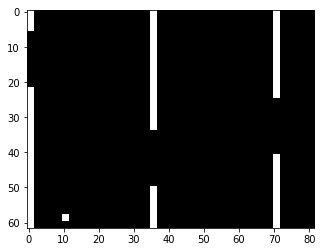

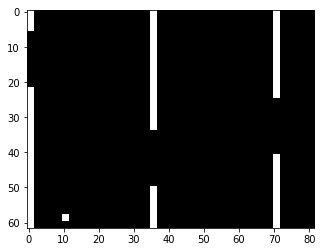

2500
tensor([[-0.8251, -2.5639,  0.8539, -0.2496,  1.7556]], device='cuda:0',
       grad_fn=<AddBackward0>)


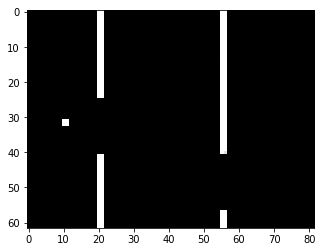

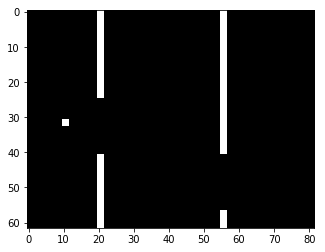

2600
tensor([[-1.4660,  0.5275,  0.1871,  0.6275,  0.8721]], device='cuda:0',
       grad_fn=<AddBackward0>)


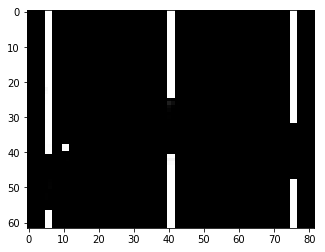

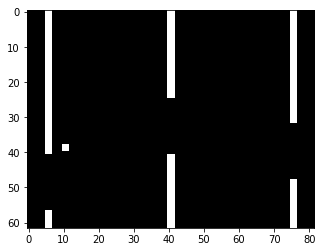

2700
tensor([[ 0.2375,  0.9568, -0.0110,  0.8913,  0.0663]], device='cuda:0',
       grad_fn=<AddBackward0>)


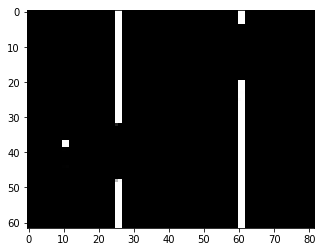

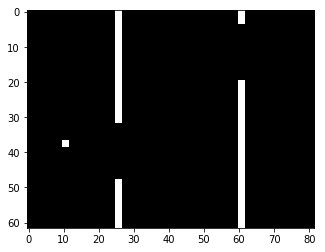

2800
tensor([[-0.6946, -0.5657, -1.5072, -1.2400,  0.0999]], device='cuda:0',
       grad_fn=<AddBackward0>)


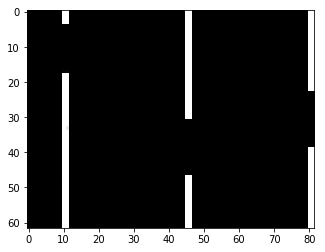

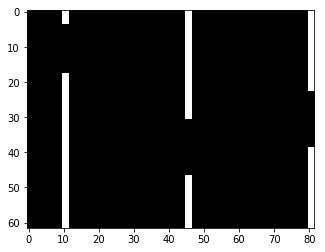

2900
tensor([[-0.0145, -0.0999,  1.9375, -2.4817,  1.4085]], device='cuda:0',
       grad_fn=<AddBackward0>)


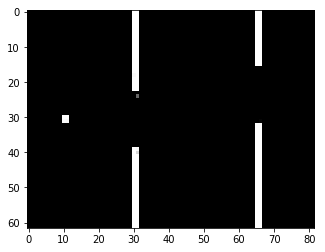

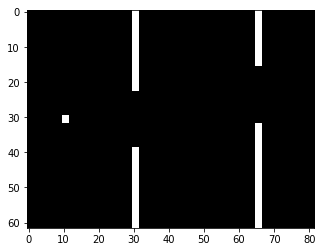

3000
tensor([[ 2.2353, -0.2762,  0.7578, -1.8570, -0.0770]], device='cuda:0',
       grad_fn=<AddBackward0>)


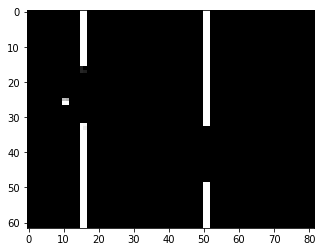

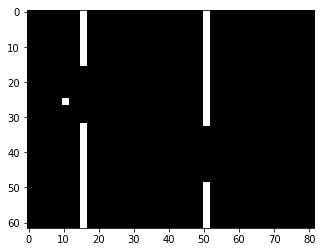

3100
tensor([[-0.2411, -0.5065,  1.2152,  0.7473, -1.8905]], device='cuda:0',
       grad_fn=<AddBackward0>)


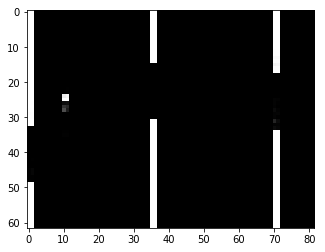

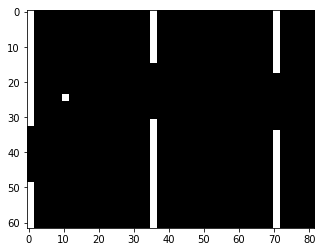

3200
tensor([[-1.1726, -1.7449,  1.6640, -1.2557,  1.0951]], device='cuda:0',
       grad_fn=<AddBackward0>)


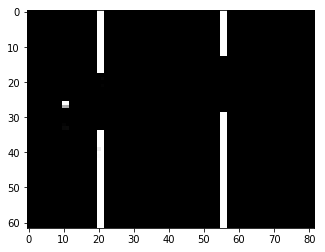

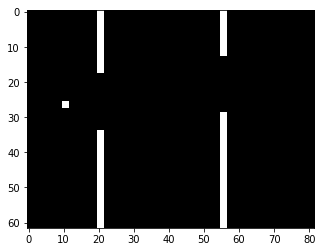

3300
tensor([[-0.9205,  0.5110,  0.2002,  1.1130,  0.8667]], device='cuda:0',
       grad_fn=<AddBackward0>)


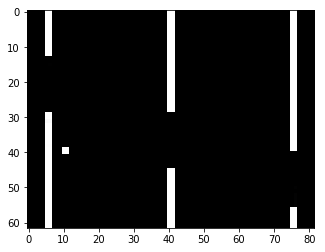

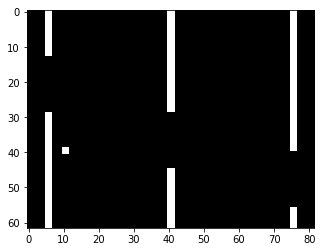

3400
tensor([[ 0.2867,  0.6195, -0.5773,  0.5960, -0.3252]], device='cuda:0',
       grad_fn=<AddBackward0>)


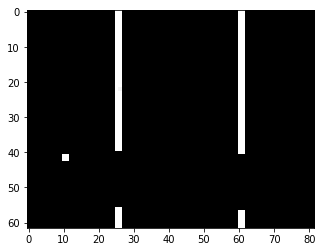

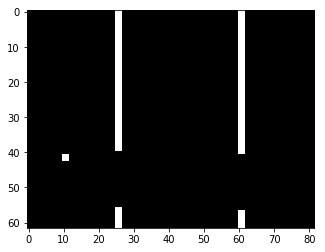

3500
tensor([[-0.5541,  0.2142, -1.6070, -0.0438, -0.9739]], device='cuda:0',
       grad_fn=<AddBackward0>)


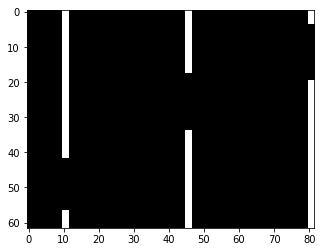

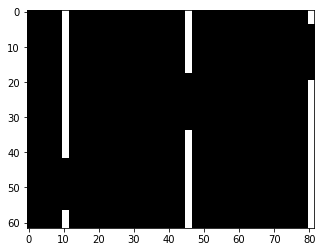

3600
tensor([[-0.1702, -1.1731, -0.0250, -1.5968,  0.6151]], device='cuda:0',
       grad_fn=<AddBackward0>)


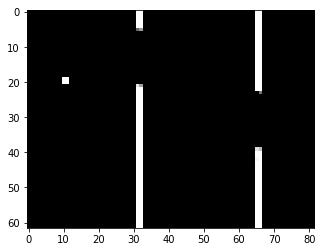

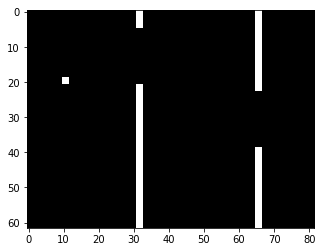

3700
tensor([[ 2.3352,  2.4659,  0.6160, -1.2917,  0.1166]], device='cuda:0',
       grad_fn=<AddBackward0>)


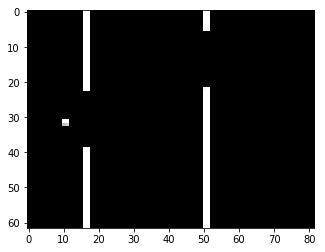

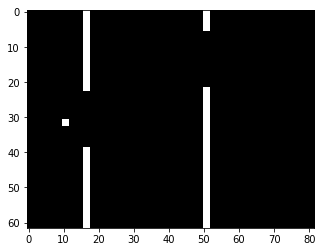

3800
tensor([[ 0.9671, -0.2884,  0.3088,  0.6589, -1.7670]], device='cuda:0',
       grad_fn=<AddBackward0>)


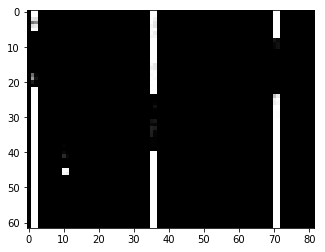

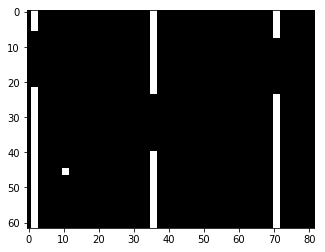

3900
tensor([[-1.4726, -0.6670,  1.4277, -0.3012,  0.3929]], device='cuda:0',
       grad_fn=<AddBackward0>)


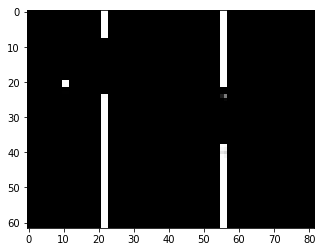

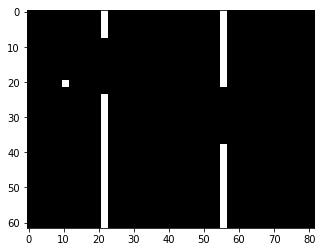

4000
tensor([[-2.8548,  1.0307, -0.6025,  1.8177,  1.0540]], device='cuda:0',
       grad_fn=<AddBackward0>)


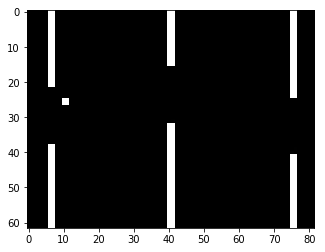

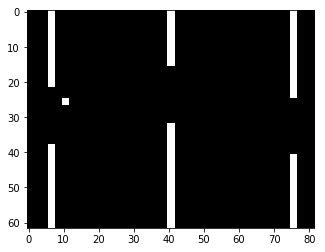

4100
tensor([[ 1.2354,  2.9979, -1.0260,  0.3432, -0.2566]], device='cuda:0',
       grad_fn=<AddBackward0>)


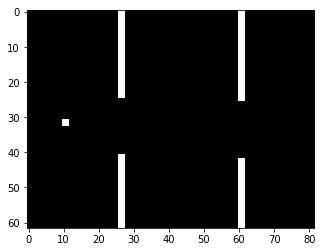

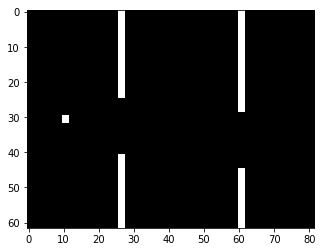

4200
tensor([[-1.0145,  0.4129, -2.0204, -0.1151, -0.5377]], device='cuda:0',
       grad_fn=<AddBackward0>)


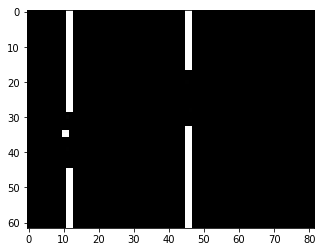

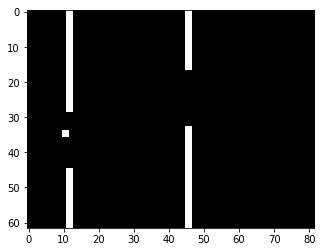

4300
tensor([[-0.7065, -1.1219, -0.6826, -2.1812,  0.5032]], device='cuda:0',
       grad_fn=<AddBackward0>)


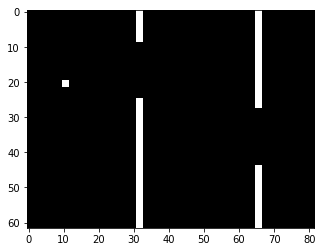

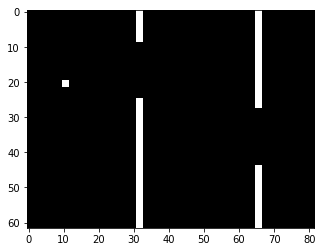

4400
tensor([[ 1.3423,  1.8364,  0.3033, -0.8540,  0.0898]], device='cuda:0',
       grad_fn=<AddBackward0>)


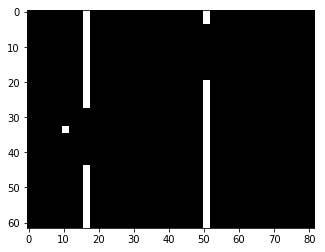

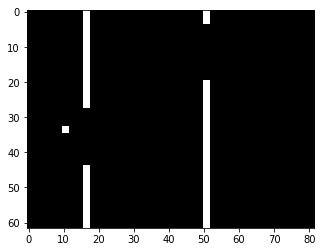

4500
tensor([[ 0.6225, -0.4446,  0.1158,  0.9197, -0.9082]], device='cuda:0',
       grad_fn=<AddBackward0>)


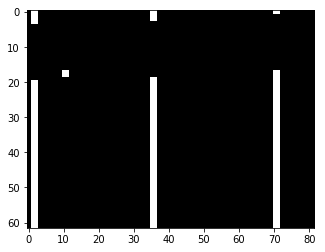

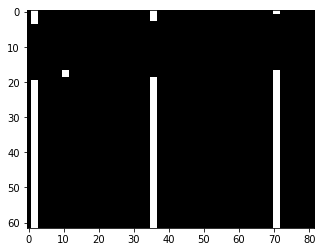

4600
tensor([[-1.0170, -0.4932,  0.5295, -0.2997,  0.7494]], device='cuda:0',
       grad_fn=<AddBackward0>)


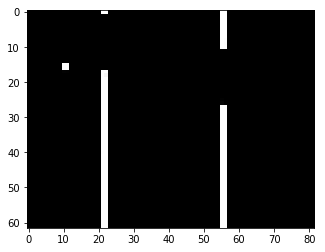

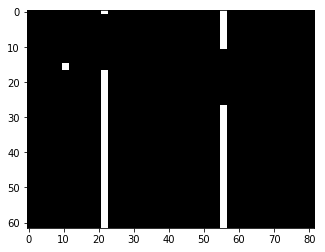

4700
tensor([[-1.5223,  0.0605,  0.2098,  0.9733,  0.2924]], device='cuda:0',
       grad_fn=<AddBackward0>)


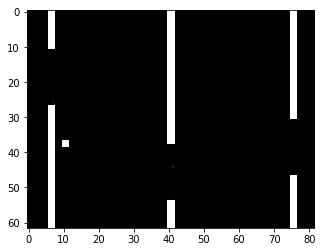

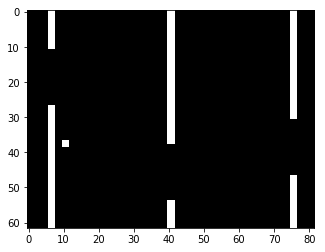

4800
tensor([[ 0.7505,  2.0653, -1.0228,  0.0859, -0.0715]], device='cuda:0',
       grad_fn=<AddBackward0>)


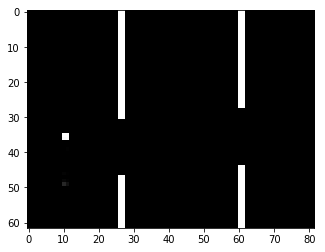

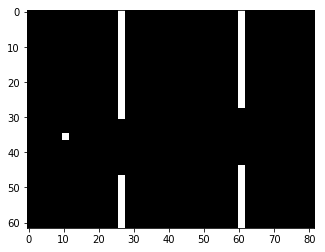

4900
tensor([[-1.2080,  0.6094, -1.4101, -0.7439,  0.4218]], device='cuda:0',
       grad_fn=<AddBackward0>)


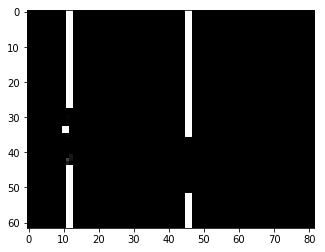

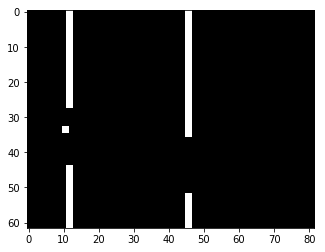

5000
tensor([[ 0.1665,  0.1807,  0.8127, -1.6344,  0.2752]], device='cuda:0',
       grad_fn=<AddBackward0>)


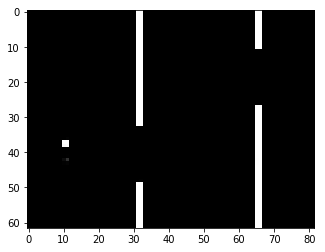

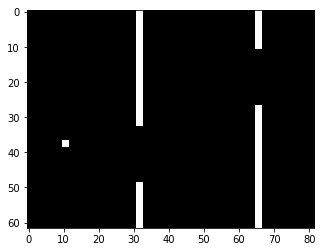

5100
tensor([[ 1.2952, -0.4104,  1.6914, -0.5993,  0.5620]], device='cuda:0',
       grad_fn=<AddBackward0>)


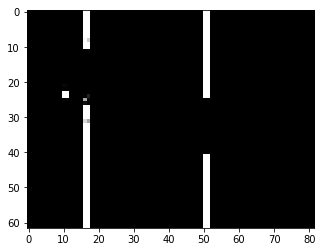

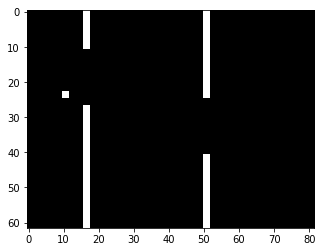

5200
tensor([[ 1.5025,  1.1921, -0.2985, -0.0082, -1.5699]], device='cuda:0',
       grad_fn=<AddBackward0>)


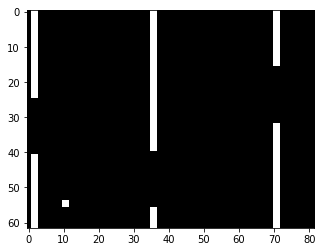

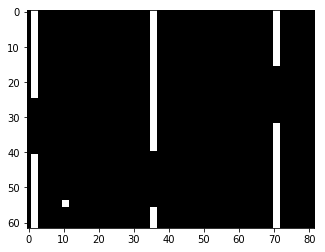

5300
tensor([[-2.9708, -1.2831,  0.8246, -0.5001, -0.0248]], device='cuda:0',
       grad_fn=<AddBackward0>)


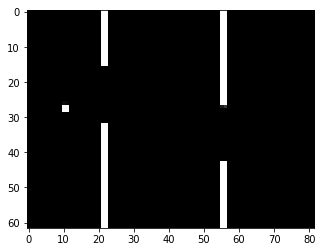

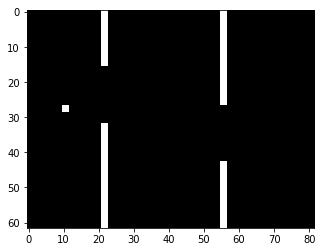

5400
tensor([[-2.3254,  0.5955, -1.1235,  0.7076,  1.2247]], device='cuda:0',
       grad_fn=<AddBackward0>)


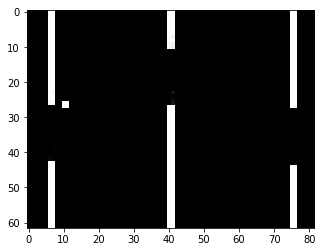

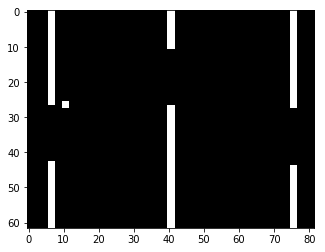

5500
tensor([[ 0.9114,  2.2156, -0.9459,  0.2479, -0.4984]], device='cuda:0',
       grad_fn=<AddBackward0>)


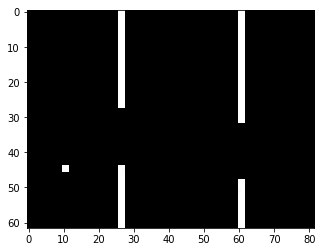

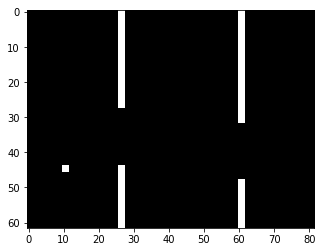

5600
tensor([[-0.8974,  0.6211, -1.0918, -0.2978,  0.1313]], device='cuda:0',
       grad_fn=<AddBackward0>)


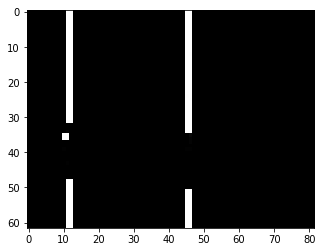

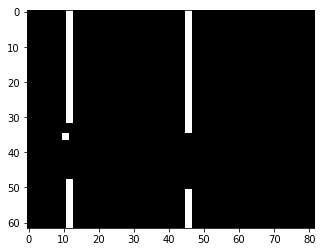

5700
tensor([[-0.3565, -0.2116,  0.1773, -2.7249,  0.4823]], device='cuda:0',
       grad_fn=<AddBackward0>)


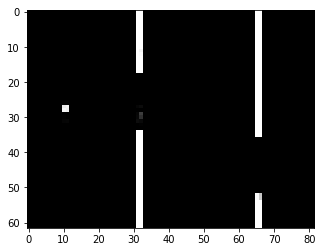

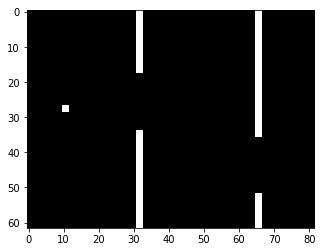

5800
tensor([[ 0.7756,  1.3254,  0.1211, -0.6444, -0.0309]], device='cuda:0',
       grad_fn=<AddBackward0>)


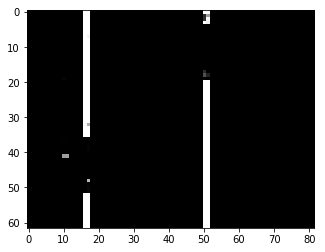

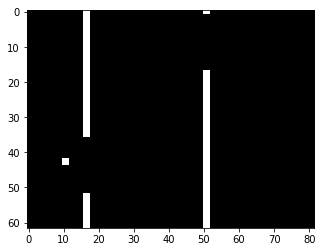

In [24]:
#vae = torch.load('./vae.pt')
for i in range(len(new.xArray)-1):
    if i%100==0:
        print(i)
        mat = vae.forward((new.xArray[i+1]).to(device))[0][0].reshape(62,82).detach().cpu()
        means, log_var = vae.encoder((new.xArray[i+1]).reshape(1,62*82).to(device))
        std = torch.exp(0.5 * log_var)
        eps = torch.randn([1, 5])        
        eps = eps.cuda()        
        z = eps * std + means
        print(z)
        f.show_image(mat)
        f.show_image(new.xArray[i+1])

In [ ]:
def show_image(mat,name):
    data = mat.numpy()
    new_data = np.zeros(np.array(data.shape) * 10)

    for j in range(data.shape[0]):
        for k in range(data.shape[1]):
            new_data[j * 10: (j+1) * 10, k * 10: (k+1) * 10] = data[j, k]

    plt.imsave(name,new_data,cmap="gray")

In [ ]:
i=101
mat = vae.forward((new.xArray[i]).to(device))[0][0].reshape(62,82).detach().cpu()
show_image(mat,"Reconstruction")
show_image(new.xArray[i],"original")

In [ ]:
i = 161
mat = vae.forward((new.xArray[i]).to(device))[0][0].reshape(62,82).detach().cpu()
show_image(mat,"Reconstruction1")
show_image(new.xArray[i],"original1")

In [ ]:
i = 191
mat = vae.forward((new.xArray[i]).to(device))[0][0].reshape(62,82).detach().cpu()
show_image(mat,"Reconstruction2")
show_image(new.xArray[i],"original2")

# illustrate Latent Dimensions

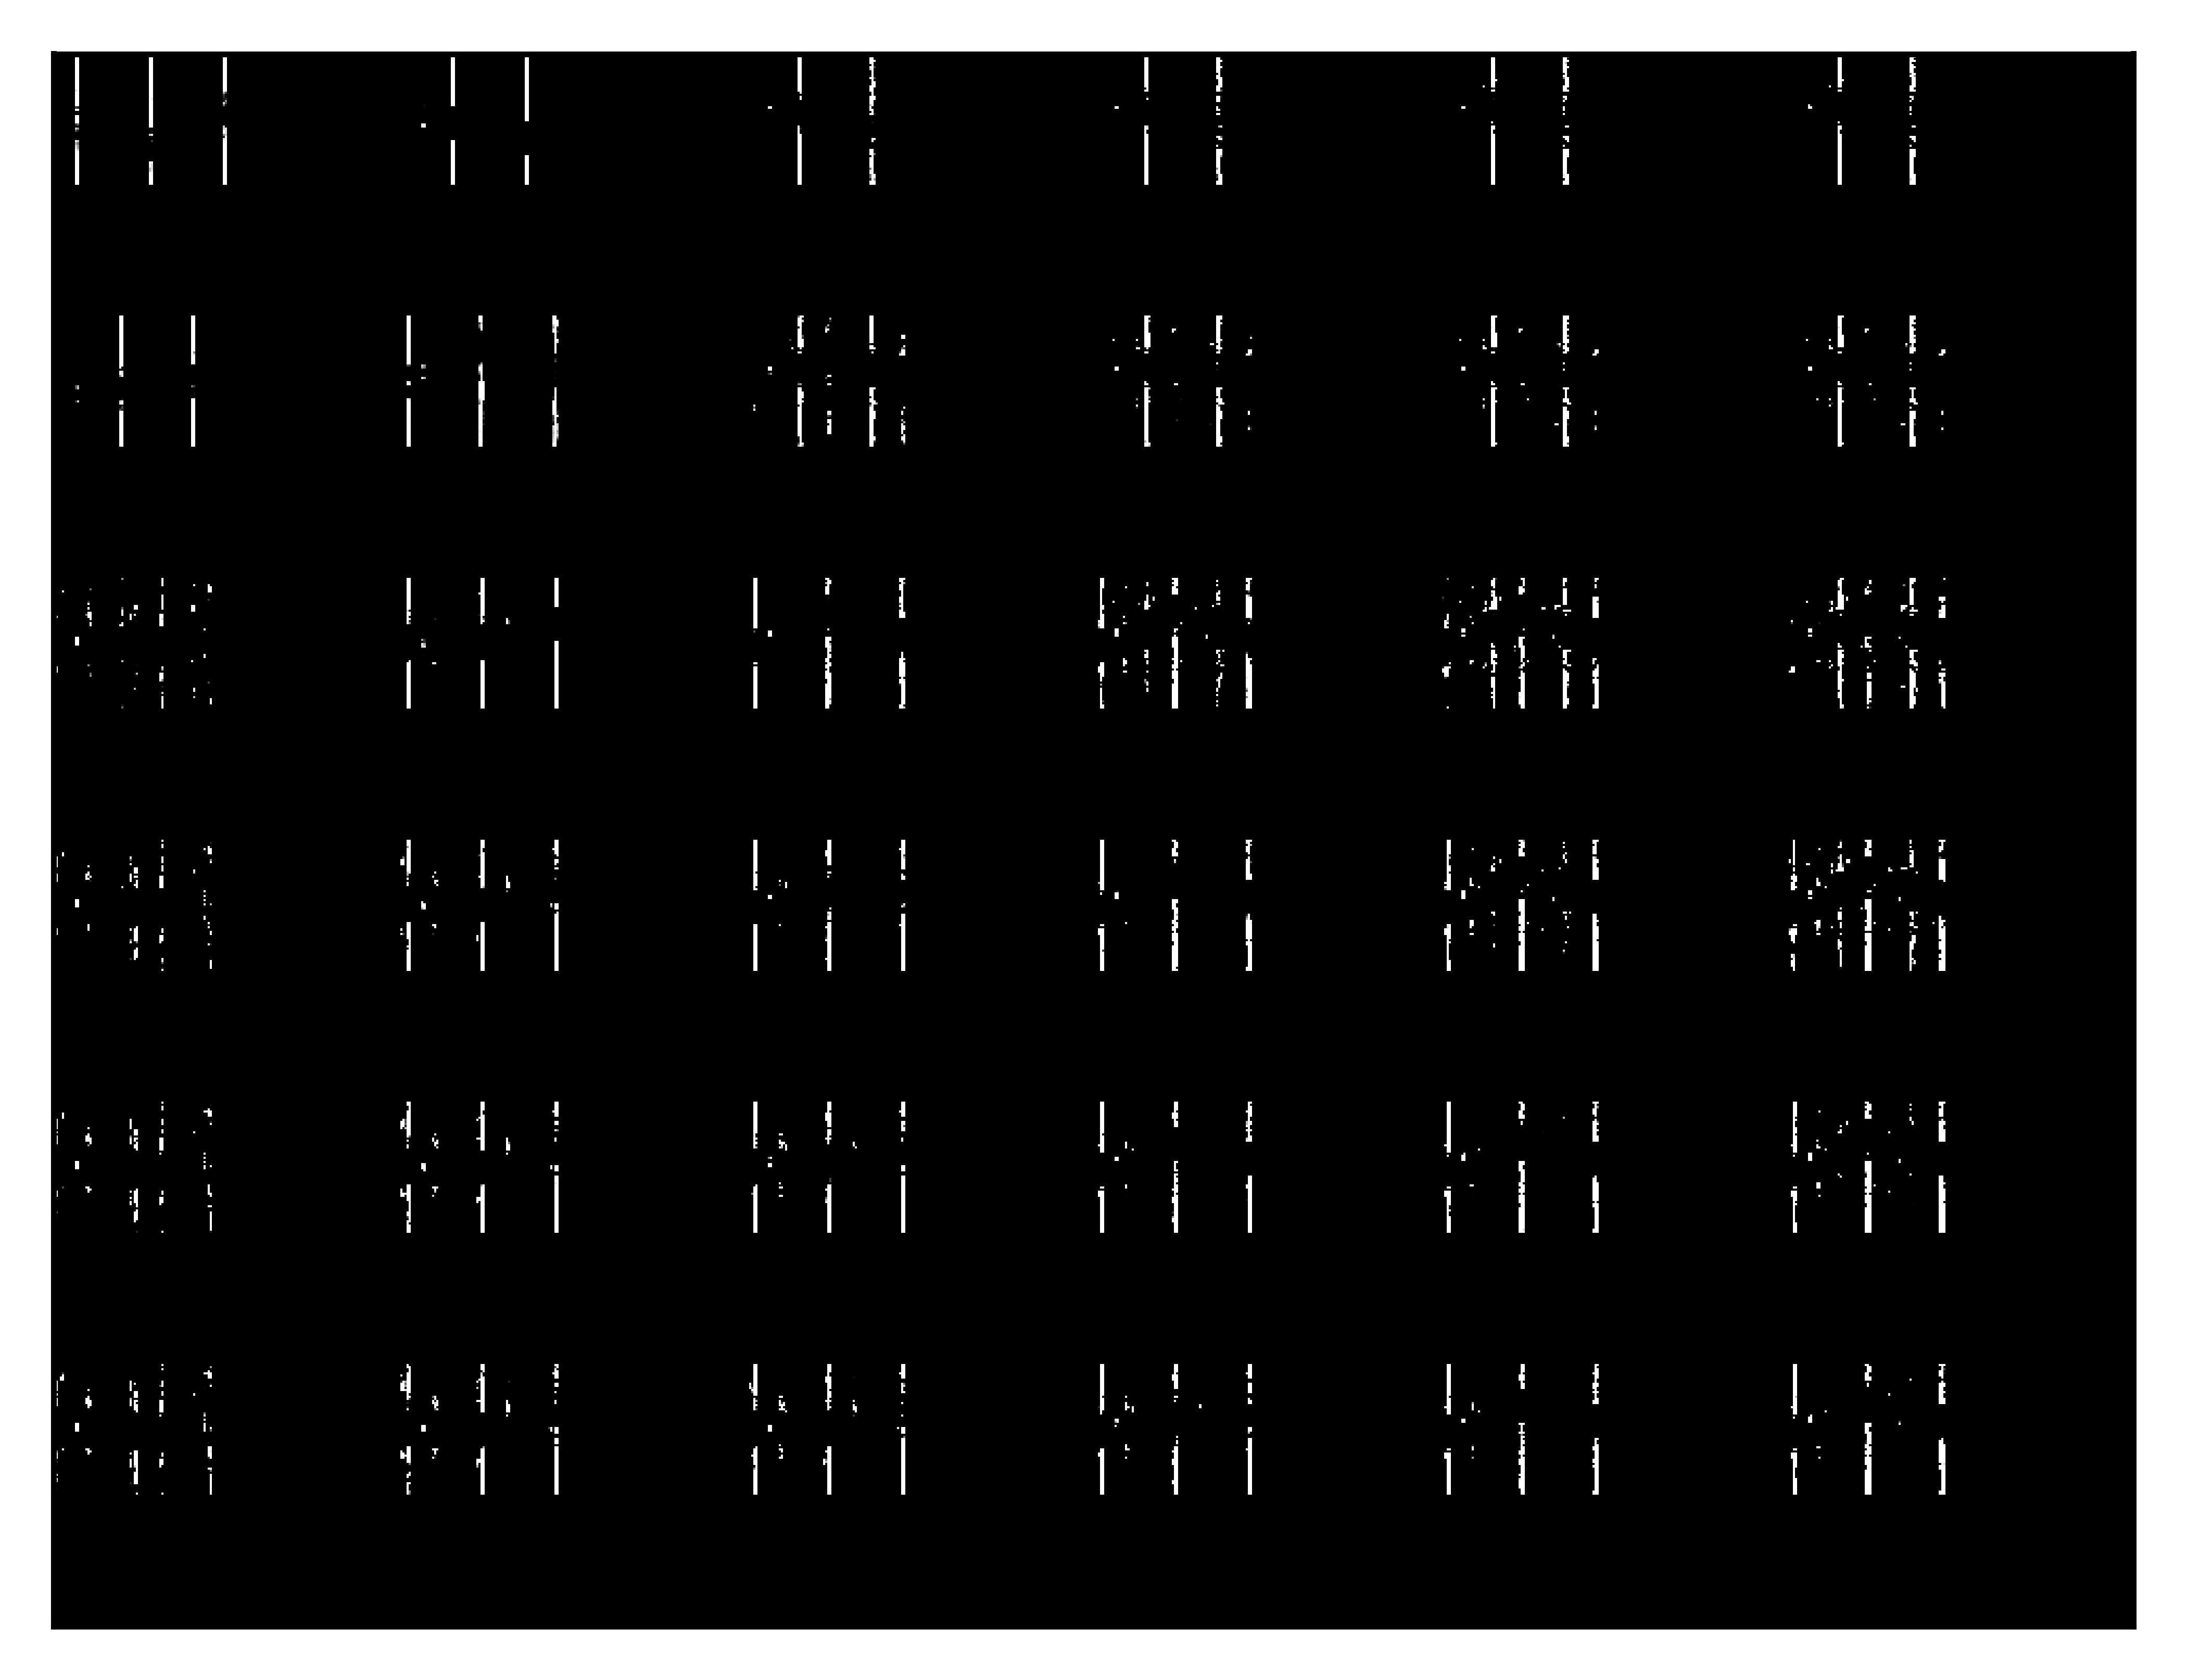

In [35]:
plt.figure(dpi=1000)
img = torch.zeros(744,984)
for i in range(0, 6):
    for j in range(0,6):
        label = torch.tensor([0,0,(-10+20*i)/5,(-10+20*j)/5,0]).float().to(device)
        sample = vae.decoder.forward(label).detach().view(-1,62,82).cpu()
        img[(i*2)*62:(i*2)*62+62,(j*2)*82:(j*2)*82+82] = sample[0]
plt.imshow(img,cmap = "gray")
plt.xticks([])
plt.yticks([])
plt.savefig('vae_dec.png')